In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
imp

In [4]:
# Step 1: Data Preparation and Preprocessing
df = pd.read_csv('/Users/hitteshkumarm/Desktop/COLLEGE/FeyNN Labs/RS_Session_256_AU_95_C.csv')
df.head(5)

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0,NaN,NaN,NaN,7.0,159
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,NaN,NaN,NaN,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,NaN,NaN,NaN,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,NaN,NaN,NaN,8.0,64241
4,Chandigarh,298,1410.0,182,NaN,40.0,NaN,NaN,NaN,1.0,1931


In [5]:
# Data Cleaning
df = df[~df['State Name'].str.contains('Grand Total')]  # Exclude "Grand Total" rows
columns_to_clean = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other']
for col in columns_to_clean:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
# Handle missing values if any
df[columns_to_clean] = df[columns_to_clean].fillna(0)

In [7]:
# Step 2: Data Analysis
# Descriptive Statistics
two_wheeler_stats = df['Two Wheeler'].describe()
three_wheeler_stats = df['Three Wheeler'].describe()
four_wheeler_stats = df['Four Wheeler'].describe()

print("Two Wheeler Stats:\n", two_wheeler_stats)
print("Three Wheeler Stats:\n", three_wheeler_stats)
print("Four Wheeler Stats:\n", four_wheeler_stats)

Two Wheeler Stats:
 count       32.000000
mean      8829.437500
std      15027.420445
min          1.000000
25%         68.500000
50%       1984.500000
75%      10306.500000
max      56737.000000
Name: Two Wheeler, dtype: float64
Three Wheeler Stats:
 count        32.000000
mean      20224.562500
std       49311.798762
min           0.000000
25%          31.500000
50%        1992.000000
75%       17007.250000
max      257159.000000
Name: Three Wheeler, dtype: float64
Four Wheeler Stats:
 count      32.00000
mean      822.96875
std      1661.50339
min         2.00000
25%        13.75000
50%       131.50000
75%       638.50000
max      7212.00000
Name: Four Wheeler, dtype: float64


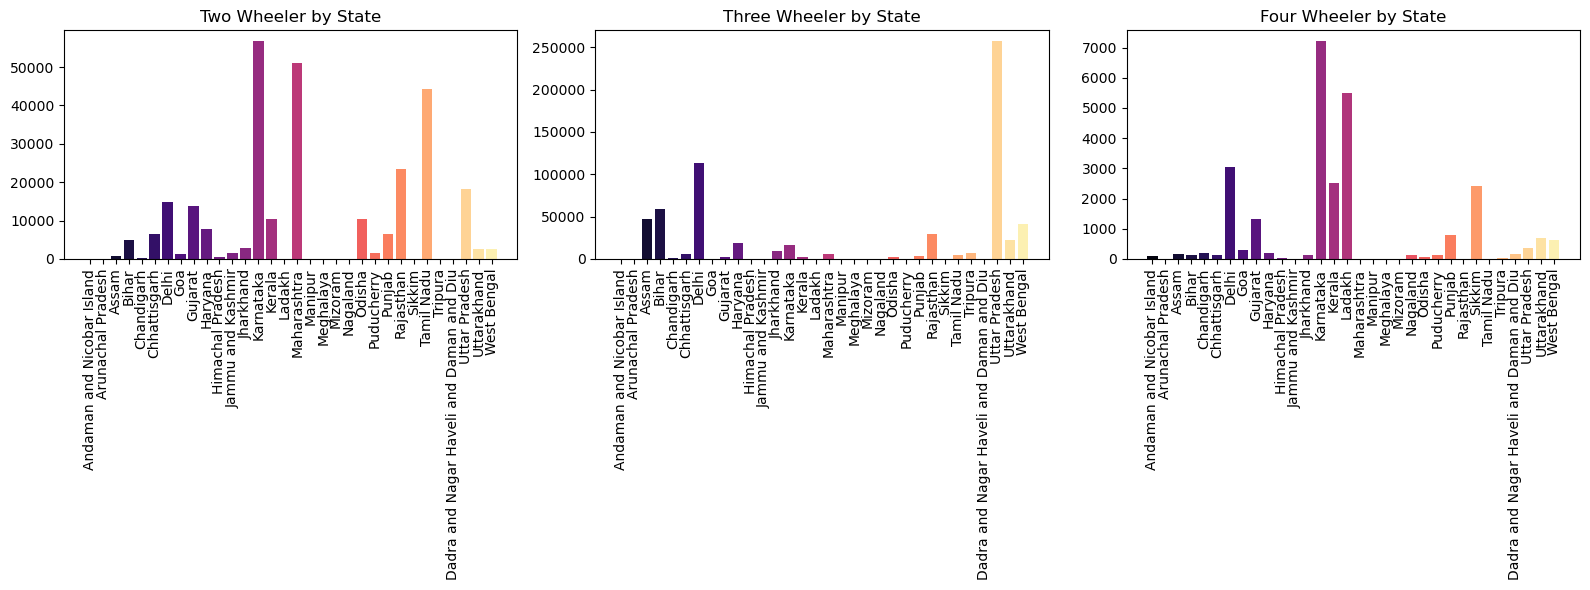

In [17]:
# Exclude "Grand Total" rows
df = df[~df['State Name'].str.contains('Grand Total')]

# Create a color gradient for the bar charts
colors = sns.color_palette("magma", len(df))

# Step 2: Data Analysis and Visualization
plt.figure(figsize=(16, 6))

# Bar chart for Two Wheeler by State
plt.subplot(1, 3, 1)
plt.bar(df['State Name'], df['Two Wheeler'], color=colors)
plt.xticks(rotation=90)
plt.title('Two Wheeler by State')

# Bar chart for Three Wheeler by State
plt.subplot(1, 3, 2)
plt.bar(df['State Name'], df['Three Wheeler'], color=colors)
plt.xticks(rotation=90)
plt.title('Three Wheeler by State')

# Bar chart for Four Wheeler by State
plt.subplot(1, 3, 3)
plt.bar(df['State Name'], df['Four Wheeler'], color=colors)
plt.xticks(rotation=90)
plt.title('Four Wheeler by State')

plt.tight_layout()
plt.show()

/var/folders/9j/5wlfmhp575qfg72zsmdt2q3c0000gn/T/ipykernel_1280/3577327038.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


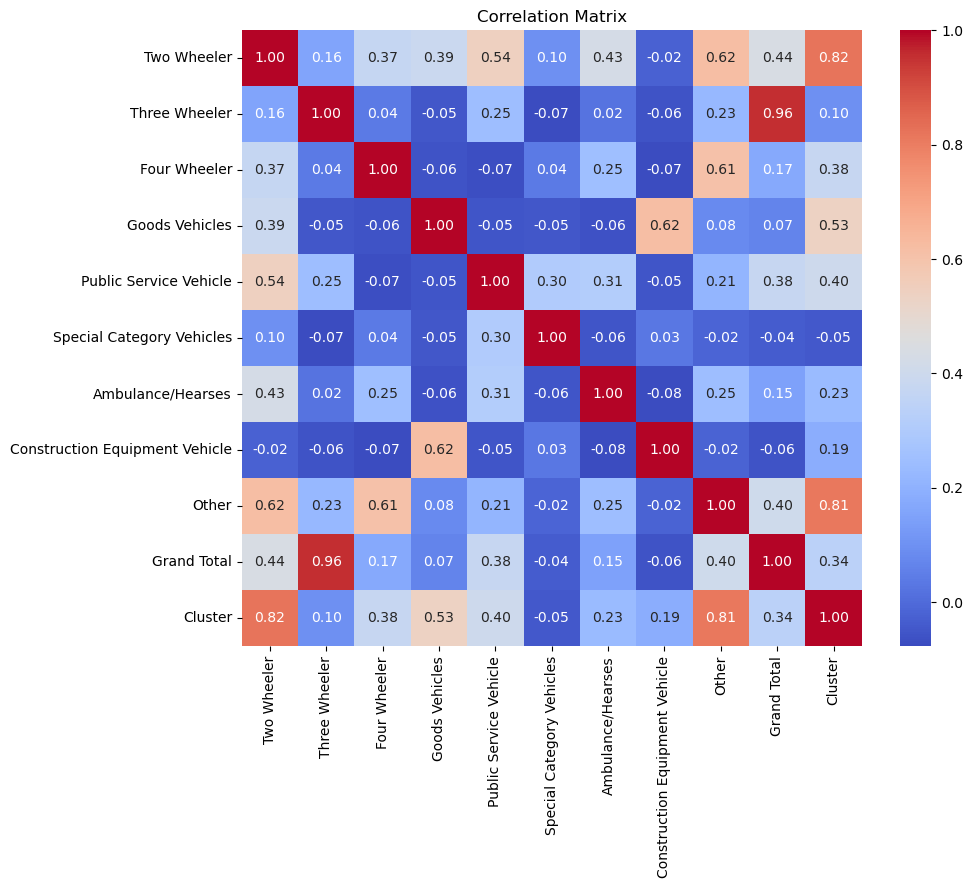

In [13]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Step 3: Clustering Algorithm
# Feature Selection and Scaling
X = df[columns_to_clean]  # Select columns for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

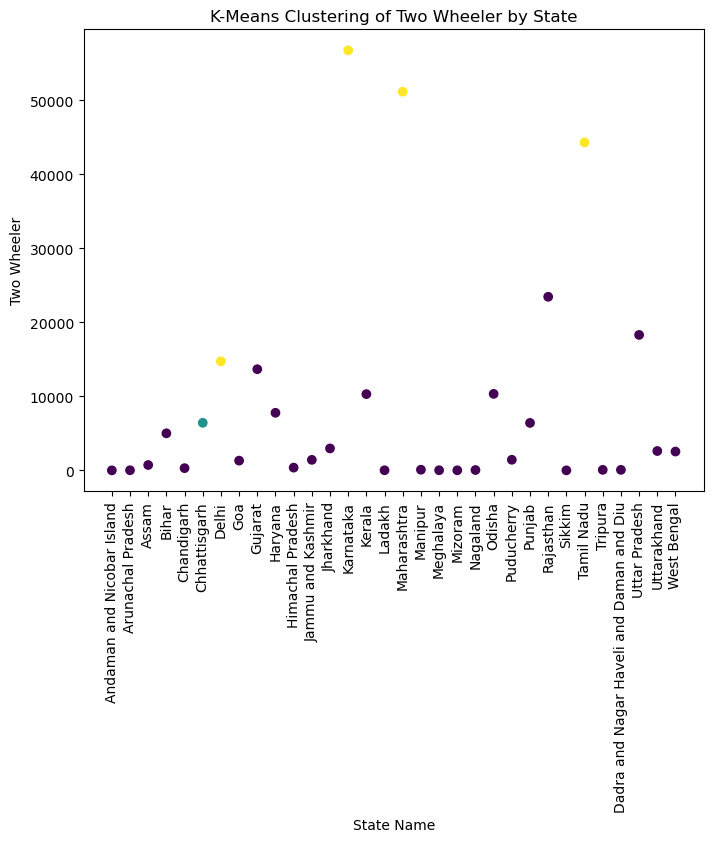

In [10]:
# K-Means Clustering
k = 3  # You can adjust the number of clusters as needed
n_init = 10  # Number of times the k-means algorithm will be run with different centroid seeds
kmeans = KMeans(n_clusters=k, random_state=0, n_init=n_init)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Visualization of Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['State Name'], df['Two Wheeler'], c=df['Cluster'], cmap='viridis')
plt.xlabel('State Name')
plt.ylabel('Two Wheeler')
plt.title('K-Means Clustering of Two Wheeler by State')
plt.xticks(rotation=90)
plt.show()